# Brownian dynamics in a harmonic oscillator potential (1 particle)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

font = {'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [77]:
def f(x, k):
    return -k*x

def V_harmonic(x):
    return x*x/2

def get_Boltzmann_factor(x_vector, V):
    factor = np.zeros(len(x_vector))  
    for i in range(len(x_vector)):
        factor[i] = np.exp(-1*V(x_vector[i]))
    return factor

def plot_X_histogram(trajectory, V, norm_factor):
    plt.scatter(trajectory, np.multiply(get_Boltzmann_factor(trajectory, V), norm_factor), color ='violet', label = "Analytic")
    plt.hist(trajectory, 50, density = 'True')
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("pdf")
    plt.show()
    
def plot_X_histogram_potential(trajectory, V, norm_factor, pot_factor):
    plt.scatter(trajectory, np.multiply(get_Boltzmann_factor(trajectory, V), norm_factor), 
             color ='violet', label = "exp(-V(x)/kT)")
    plt.hist(trajectory, 50, density = 'True')
    plt.plot(trajectory, np.multiply(np.vectorize(V)(trajectory), pot_factor), color ='black', label = "V(x)")
    plt.xlabel("X")
    plt.ylabel("pdf")
    plt.legend()
    plt.show()
    
def get_trajectory(N_steps, dt, f, X_0, k=1):
    D = 1
    kT = 1

    noise_std = np.sqrt(2.0 * D * dt)
    force_factor = D * dt / kT

    trajectory = []
    displacement = []

    dX = X_0
    trajectory.append(dX)

    for i in range(N_steps-1):
        displacement.append(dX)
        dX = f(trajectory[i], k)*force_factor+np.random.normal(0.0, 1.0) * noise_std
        trajectory.append(trajectory[i] + dX)
    
    return trajectory, displacement

In [3]:
N_steps = 100000
dt = 0.01

trajectory, displacement = get_trajectory(N_steps, dt, f, 0.00)



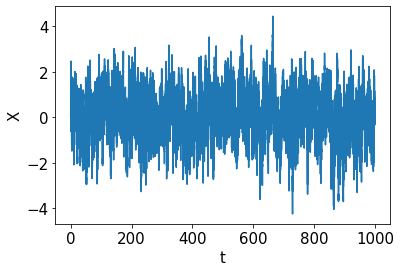

In [12]:
SMALL_SIZE=15
plt.rc('legend', fontsize=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

time = np.arange(N_steps) * dt
plt.plot(time, trajectory)
plt.xlabel("t")
plt.ylabel("X")
plt.show()

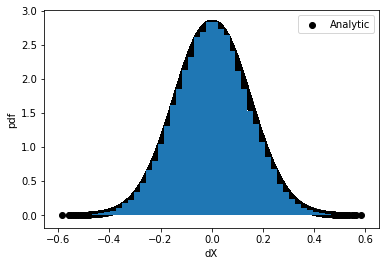

In [10]:
plt.hist(displacement, 50, density = 'True')
plt.scatter(displacement, np.multiply(np.exp(np.multiply(np.square(displacement),-1/(4*dt))), 1/np.sqrt(4*np.pi*dt)),
            color = 'black', label = "Analytic")
plt.xlabel("dX")
plt.ylabel("pdf")
plt.legend()
plt.show()

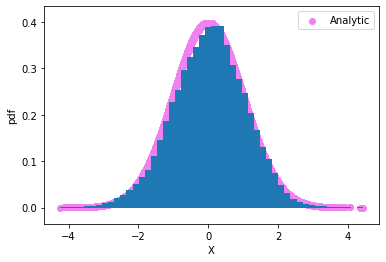

In [11]:
plot_X_histogram(trajectory, V_harmonic, np.sqrt(1/(2*np.pi)))

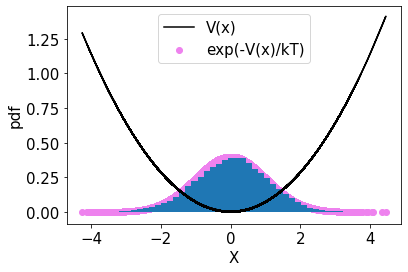

In [116]:
SMALL_SIZE=15
plt.rc('legend', fontsize=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plot_X_histogram_potential(trajectory, V_harmonic, np.sqrt(1/(2*np.pi)), 1/7)

# Brownian dynamics in exotic potentials (1 particle)

In [99]:
#def double_well(x):
 #   return (x-1)**4/4-(x+2)**2/2+(x-1)**3

def double_well(x):
    return ((x-1)**4)/4 - (3*x**3)/3 + (x**2)/2 + x

#def force_double_well(x, k):
#    return -(x-1)**3+(x+2)-3*(x-1)**2

def force_double_well(x, k=1):
    return -x**3 + 3*x**2 - x**2 - 1

def double_well_2(x):
    return (x-1)**4/4-(x+3)**2/2+(x-1)**3

def force_double_well_2(x, k):
    return -(x-1)**3+(x+3)-3*(x-1)**2

def LJ_pot(x):
        lj_rm2 = 9
        r2 = x*x
        lj_eps = 1
        req_r2 = lj_rm2 / r2 
        req_r6 = req_r2 * req_r2 * req_r2
        req_r12 = req_r6 * req_r6

        return lj_eps * (req_r12 - 2.0 * req_r6)

def LJ_force(x, lj_eps=3, lj_rm2 = 9):
    #lj_rm2 = 9
    r2 = x*x
    #lj_eps = 1
    req_r2 = lj_rm2 / r2 
    req_r6 = req_r2 * req_r2 * req_r2
    req_r8 = req_r6 * req_r2
    req_r14 = req_r6 * req_r8
    
    return -12.0 * lj_eps*x / np.sqrt(lj_rm2) * (req_r8 - req_r14)

Double Wells

In [100]:
trajectory_1, displacement_1 = get_trajectory(N_steps, dt, force_double_well, 0.0)
trajectory_2, displacement_2 = get_trajectory(N_steps, dt, force_double_well_2, 0.0)

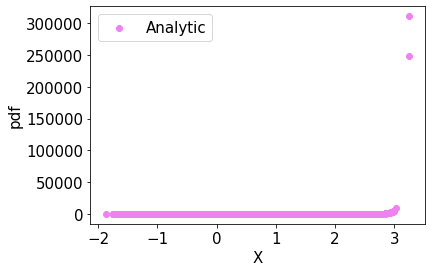

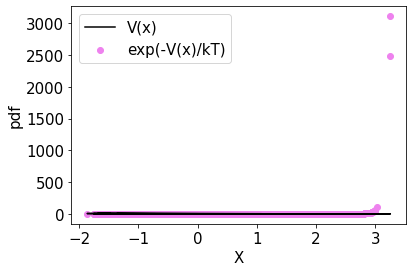

In [101]:
plot_X_histogram(trajectory_1, double_well, np.sqrt(1/(2*np.pi))/365)
plot_X_histogram_potential(trajectory_1, double_well, np.sqrt(1/(2*np.pi))/36500, 1/7)

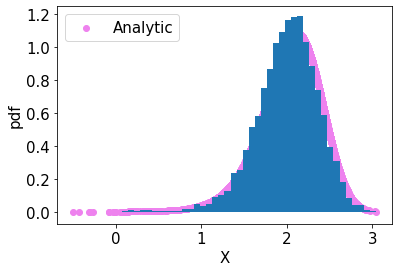

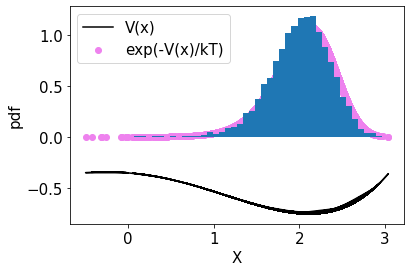

In [102]:
plot_X_histogram(trajectory_2, double_well_2, np.sqrt(1/(2*np.pi))/30000)
plot_X_histogram_potential(trajectory_2, double_well_2, np.sqrt(1/(2*np.pi))/30000, 1/15)

Lennard-Jones

In [110]:
N_steps = 100000
dt = 0.0001
trajectory_3, displacement_3 = get_trajectory(N_steps, dt, LJ_force, 2.5)

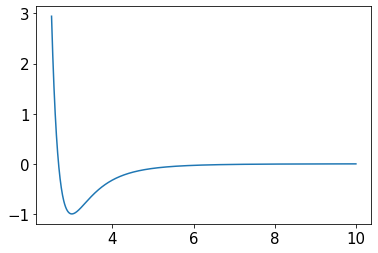

In [111]:
r = np.linspace(2.5, 10, 1000)
plt.plot(r, np.vectorize(LJ_pot)(r))
plt.show()

[2.5, 2.5322335994805525, 2.540532194520545, 2.539969774639838, 2.5660952010675637, 2.58019988144581, 2.5853979780961462, 2.5800097224052956, 2.591619924770045, 2.5956203588472198]


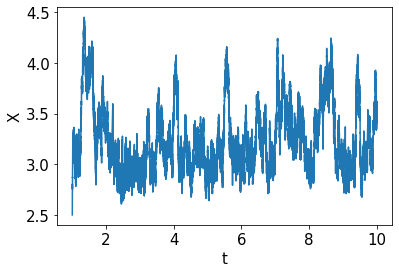

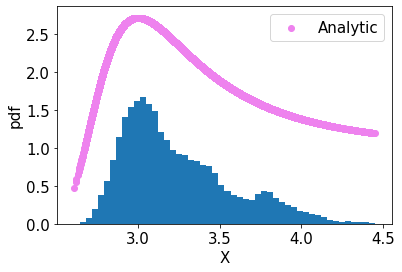

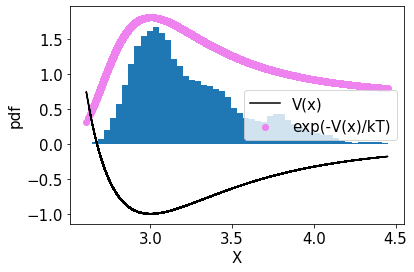

In [114]:
print(trajectory_3[0:10])

plt.plot(np.linspace(1, N_steps*dt, len(trajectory_3)), trajectory_3)
plt.xlabel("t")
plt.ylabel("X")
plt.show()

plot_X_histogram(trajectory_3[3000:], LJ_pot, 1)
plt.show()

plot_X_histogram_potential(trajectory_3[3000:], LJ_pot, 2/3, 1)
plt.show()


# 1D Bayesian Inference

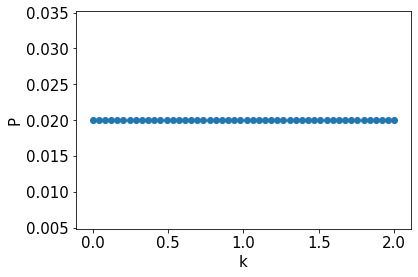

0


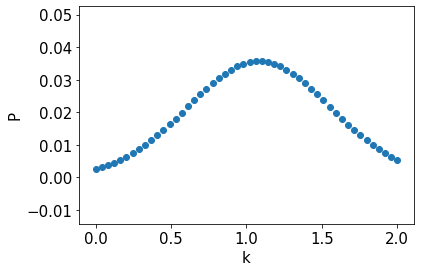

1000


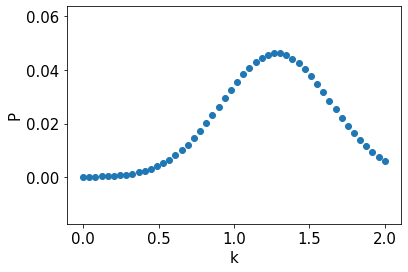

2000


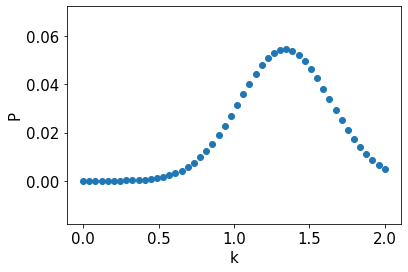

3000


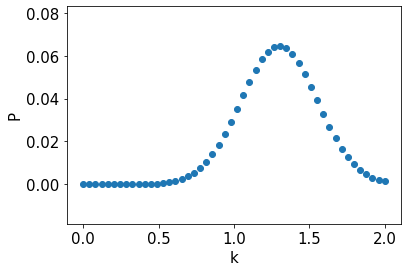

4000


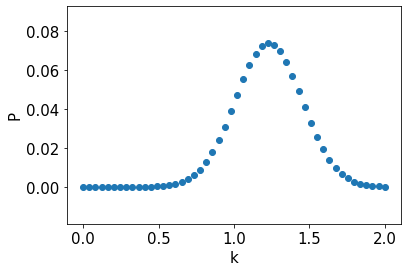

5000


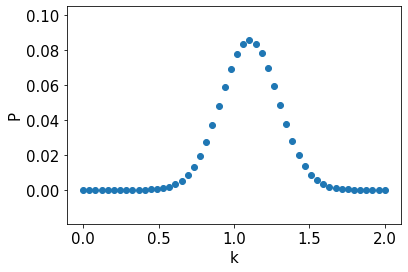

6000


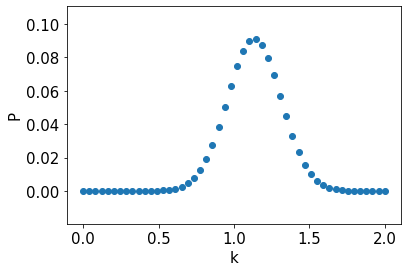

7000


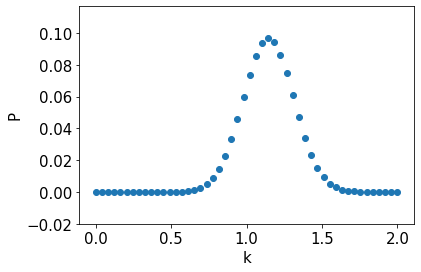

8000


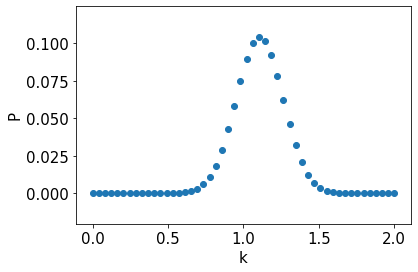

9000


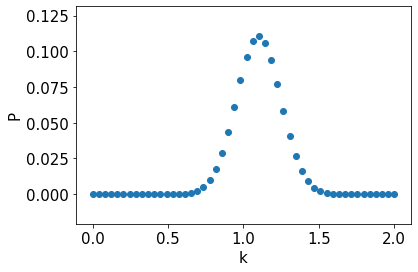

10000


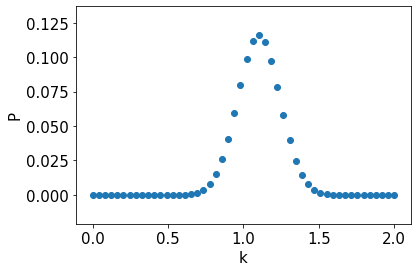

11000


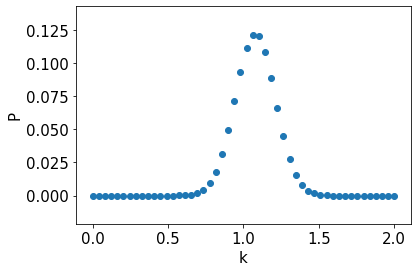

12000


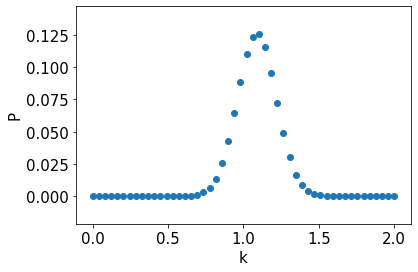

13000


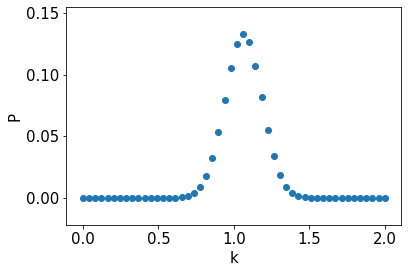

14000


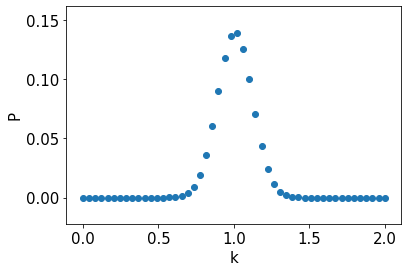

15000


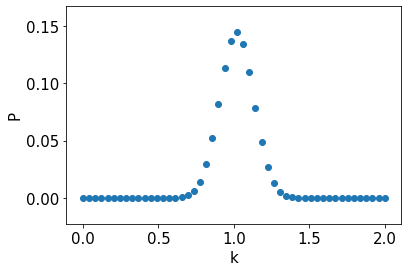

16000


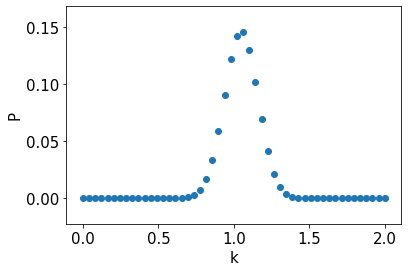

17000


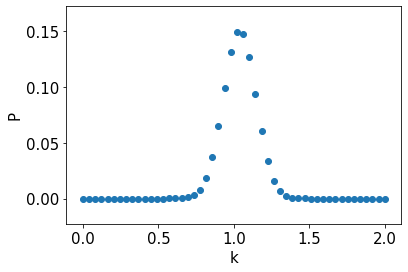

18000


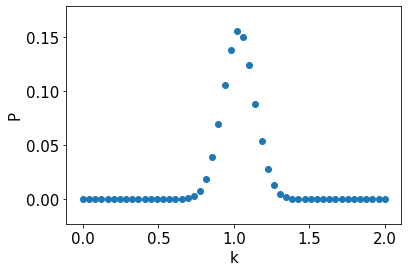

19000


In [98]:
def plot_k(k_range, prior):
    plt.scatter(k_range, prior)
    plt.xlabel("k")
    plt.ylabel("P")
    plt.show()
    

k_bins = 50
k_range = np.linspace(0, 2, k_bins)
        
D = 1.0
dt = 0.01
kT = 1.0 
noise_std = np.sqrt(2.0 * D * dt)
force_factor = D * dt / kT

initial_prior = np.ones(k_bins)*1/k_bins
p_likelihood = np.ones(len(initial_prior))

prior = initial_prior

loops = 1
while loops!=0:
    for i in range(len(trajectory)-2):
        mu = np.vectorize(f)(trajectory[i], k_range)*force_factor
        #dX = mu + np.random.normal(0.0, 1.0, k_bins)*noise_std
        dX = np.ones(k_bins)*displacement[i+1]
        p_likelihood = np.exp(np.square(np.subtract(dX, mu))* (-1/(2*noise_std**2)) )* 1/(noise_std*np.sqrt(2*np.pi))
        numerators =  np.multiply(p_likelihood, prior)
        prior = np.divide(numerators, np.sum(numerators))
        if i%1000==0 and i<20000:
            plot_k(k_range, prior)
            print(i)
    loops -= 1

In [ ]:
plot_k(k_range, prior)
print(i)

# LJ 2D Bayesian Inference

Generating LJ trajectories with variable parameters

In [119]:
def LJ_force_var(x, lj_eps=1, lj_rm2 = 9):
    #lj_rm2 = 9
    r2 = x*x
    #lj_eps = 1
    req_r2 = lj_rm2 / r2 
    req_r6 = req_r2 * req_r2 * req_r2
    req_r8 = req_r6 * req_r2
    req_r14 = req_r6 * req_r8
    
    return -12.0 * lj_eps*x / np.sqrt(lj_rm2) * (req_r8 - req_r14)

def get_trajectory_var(N_steps, dt, f, X_0, eps, rm2):
    D = 1
    kT = 1

    noise_std = np.sqrt(2.0 * D * dt)
    force_factor = D * dt / kT

    trajectory = []
    displacement = []

    dX = X_0
    trajectory.append(dX)

    for i in range(N_steps-1):
        dX = f(trajectory[i], eps, rm2)*force_factor+np.random.normal(0.0, 1.0) * noise_std
        displacement.append(dX)
        trajectory.append(trajectory[i] + dX)
    
    return trajectory, displacement

In [120]:
dt = 0.0001
trajectory_LJ, displacement_LJ = get_trajectory_var(N_steps, dt, LJ_force_var, 2.5, eps=3, rm2 = 9)


Inference part

In [121]:
def plot_eps_r(eps_range, rm2_range, prior, i):
    plt.contourf(eps_range, rm2_range, prior)
    #plt.title("i = {}".format(i))
    print("i = ", i)
    plt.ylabel("$\epsilon$")
    plt.xlabel("$r_{min}^{2}$")
    plt.colorbar()
    plt.show()
    

def Infer_LJ(trajectory_LJ, displacement_LJ, loops = 1, intermediary = True):
    eps_bins = 10
    rm2_bins = 10
    eps_range = np.linspace(1, 10, eps_bins)
    rm2_range = np.linspace(1, 10, rm2_bins)

    D = 1.0
    dt = 0.0001
    kT = 1.0 
    noise_std = np.sqrt(2.0 * D * dt)
    force_factor = D * dt / kT

    initial_prior = np.ones((eps_bins, rm2_bins))*1/(eps_bins*rm2_bins)
    p_likelihood = np.ones((eps_bins, rm2_bins))

    prior = initial_prior

    while loops!=0:
        for i in range(len(trajectory_LJ)-1):
            mu = np.vectorize(LJ_force_var)(trajectory_LJ[i], eps_range[:, np.newaxis], rm2_range)*force_factor
            dX = np.ones((eps_bins, rm2_bins))*displacement_LJ[i]
            p_likelihood = np.exp(np.square(np.subtract(dX, mu))* (-1/(2*noise_std**2)) )* 1/(noise_std*np.sqrt(2*np.pi))
            numerators =  np.multiply(p_likelihood, prior)
            prior = np.divide(numerators, np.sum(numerators))
            if intermediary:
                if i%10==0 and i<=50:
                    plot_eps_r(eps_range, rm2_range, prior, i)
                if i == 500:
                    plot_eps_r(eps_range, rm2_range, prior, i)
        loops -= 1
    plot_eps_r(eps_range, rm2_range, prior, i)

i =  0


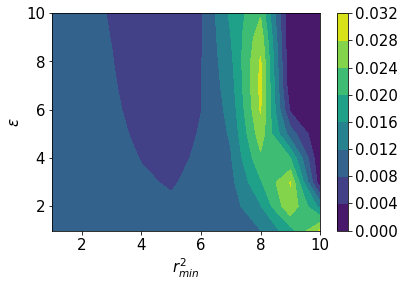

i =  10


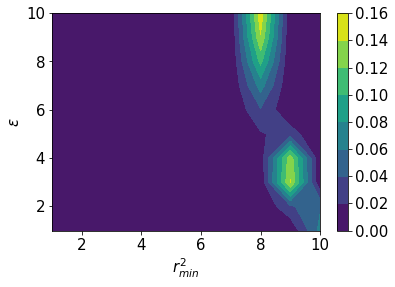

i =  20


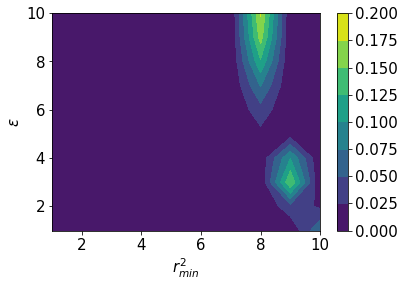

i =  30


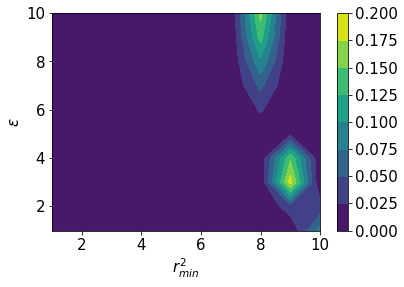

i =  40


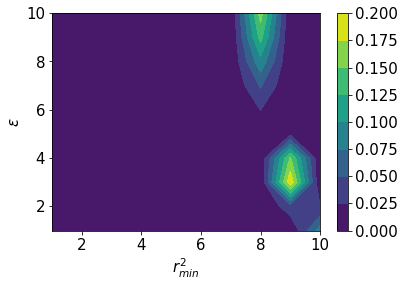

i =  50


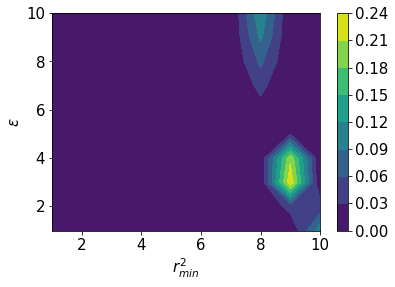

i =  500


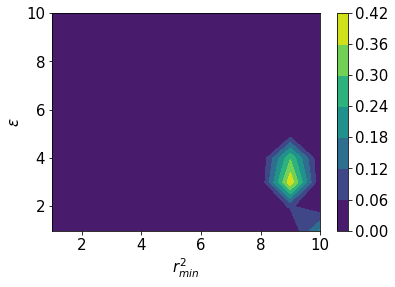

i =  99998


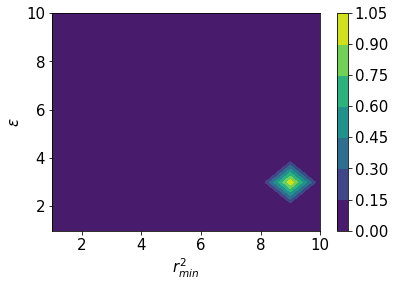

In [122]:
Infer_LJ(trajectory_LJ, displacement_LJ)

In [ ]:
t, d = get_trajectory_var(N_steps, dt, LJ_force_var, 2.5, eps = 3, rm2 = 2)
Infer_LJ(t, d, loops = 1, intermediary = False)

# 3D Bayesian Inference Double HO

In [79]:
def V_double_well_1(x):
    k1=1 
    k2=-2
    k3=-1 
    k4=1
    return k4*x**4/4+k3*x**3/3+k2*x**2/2+k1*x

def force_double_well_dw(x, k0, k1, k2, k3):
    #k1=1 
    #k2=1
    #k3=-3 
    #k4=1
    return -(k3*x**3+k2*x**2+k1*x+k0)

def get_trajectory_dw(N_steps, dt, f, X_0, k0, k1, k2, k3):
    D = 1
    kT = 1

    noise_std = np.sqrt(2.0 * D * dt)
    force_factor = D * dt / kT

    trajectory = []
    displacement = []

    dX = X_0
    trajectory.append(dX)

    for i in range(N_steps-1):
        dX = f(trajectory[i], k0, k1, k2, k3)*force_factor+np.random.normal(0.0, 1.0) * noise_std
        displacement.append(dX)
        trajectory.append(trajectory[i] + dX)
    
    return trajectory, displacement

In [80]:
N_steps = 10000
dt = 0.01
trajectory_dw, displacement_dw = get_trajectory_dw(N_steps, dt, force_double_well_dw, 0.0, k0 = 1, k1 = -2, k2 = -1, k3 = 1)


[0.0, -0.11068066803173157, -0.08400048478828129, 0.03830395684566251, 0.1068977013563983, 0.1423030813697263, 0.43882471259256006, 0.6265839496691153, 0.7239192394865814, 0.6847497203910013]


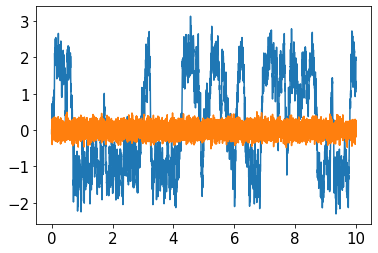

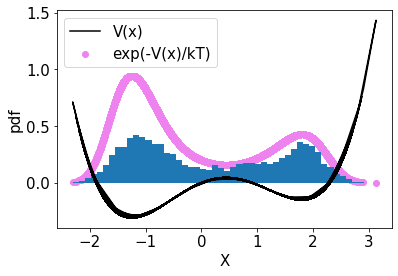

In [86]:
print(trajectory_dw[0:10])
plt.plot(np.linspace(0, 1000*dt, len(trajectory_dw)), trajectory_dw)
plt.plot(np.linspace(0, 1000*dt, len(displacement_dw)), displacement_dw)
plt.show()

plot_X_histogram_potential(trajectory_dw, V_double_well_1, 1/5, 1/5)

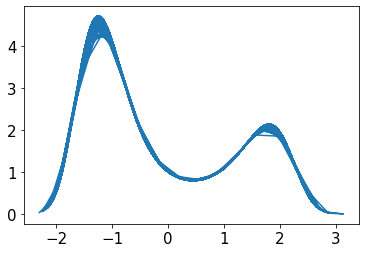

In [87]:
plt.plot(trajectory_dw, np.multiply(get_Boltzmann_factor(trajectory_dw, V_double_well_1),1))
plt.show()

Another try

In [88]:
def posterior(prior, dX, mu):
    p_likelihood = np.exp(np.square(np.subtract(dX, mu))* (-1/(2*noise_std**2)) )* 1/(noise_std*np.sqrt(2*np.pi))
    numerators =  np.multiply(p_likelihood, prior)            
    return np.divide(numerators, np.sum(numerators))
    

k_bins = 11
k1 = k2 = k3 = k4 = np.linspace(-5, 5, k_bins)
k1_val, k2_val, k3_val, k4_val = np.meshgrid(k1, k2, k3, k4)


D = 1.0
dt = 0.01
kT = 1.0 
noise_std = np.sqrt(2.0 * D * dt)
force_factor = D * dt / kT

mu = []
for X in trajectory_dw:
    mu.append(np.vectorize(force_double_well_dw)(X,
                                        k1_val, k2_val, k3_val, k4_val)*force_factor)
    
initial_prior = np.ones((k_bins, k_bins, k_bins, k_bins))*1/(k_bins)**4
prior = initial_prior

k_in_time = []
k_std_time = []
loops = 1
while loops!=0:
    for i in range(len(trajectory_dw)-2):
                p_K = posterior(prior, dX=displacement_dw[i], mu = mu[i])
                prior = p_K
                k1_mean = np.sum(np.multiply(k1_val, prior))
                k2_mean = np.sum(np.multiply(k2_val, prior))
                k3_mean = np.sum(np.multiply(k3_val, prior))
                k4_mean = np.sum(np.multiply(k4_val, prior))
                k1_mean_2 = np.sum(np.multiply(np.square(k1_val), prior))
                k2_mean_2 = np.sum(np.multiply(np.square(k2_val), prior))
                k3_mean_2 = np.sum(np.multiply(np.square(k3_val), prior))
                k4_mean_2 = np.sum(np.multiply(np.square(k4_val), prior))
                
                k_in_time.append([k1_mean, k2_mean, k3_mean, k4_mean])
                k_std_time.append([np.sqrt(k1_mean_2-np.square(k1_mean)), np.sqrt(k2_mean_2-np.square(k2_mean)),
                                  np.sqrt(k3_mean_2-np.square(k3_mean)), np.sqrt(k4_mean_2-np.square(k4_mean))])
    loops -= 1

C:\Users\40742\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


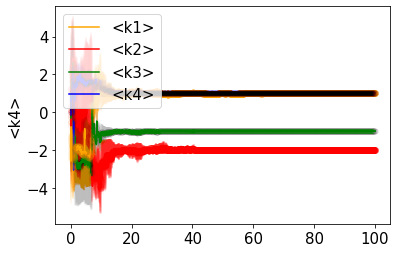

Avg k_i at the end: 
 0.9999996792716789 -1.9999999999999991 -1.0 1.0


In [89]:
k_series = np.concatenate(np.asarray(k_in_time)).ravel()
k_std = np.concatenate(np.asarray(k_std_time)).ravel()
k1_series = k_series[::4]
error_1 = k_std[::4]
k2_series = k_series[1::4]
error_2 = k_std[1::4]
k3_series = k_series[2::4]
error_3 = k_std[2::4]
k4_series = k_series[3::4]
error_4 = k_std[3::4]
plt.plot(np.linspace(0, N_steps*dt, len(k1_series)), k1_series,  color = "orange", label = "<k1>")
plt.errorbar(np.linspace(0, N_steps*dt, len(k1_series)), k1_series, yerr=error_1, fmt='-o', alpha = 0.03, color = "orange")
plt.ylabel("<k1>")

plt.errorbar(np.linspace(0, N_steps*dt, len(k2_series)), k2_series, yerr=error_2, fmt='-o', alpha = 0.03, color = "red")
plt.plot(np.linspace(0, N_steps*dt, len(k2_series)), k2_series,  color = "red", label = "<k2>")
plt.ylabel("<k2>")


plt.plot(np.linspace(0, N_steps*dt, len(k3_series)), k3_series, color = "green", label = "<k3>")
plt.errorbar(np.linspace(0, N_steps*dt, len(k3_series)), k3_series, yerr=error_3, fmt='-o', alpha = 0.003, color = "green")
plt.ylabel("<k3>")


plt.plot(np.linspace(0, N_steps*dt, len(k4_series)), k4_series,  color = "blue", label = "<k4>")
plt.errorbar(np.linspace(0, N_steps*dt, len(k4_series)), k4_series, yerr=error_4, fmt='-o', alpha = 0.003, color = "blue")
plt.ylabel("<k4>")
plt.legend()
plt.show()
print("Avg k_i at the end: \n", k1_series[-1], k2_series[-1], k3_series[-1], k4_series[-1]) 

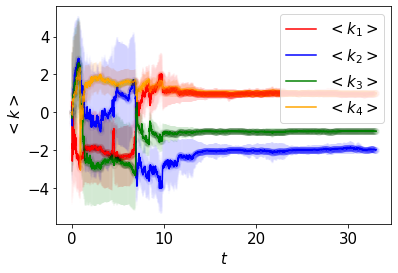

In [90]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 1})

#plt.plot(np.linspace(0, N_steps*dt, len(k1_series)), k1_series, label = "<k1>= {}".format(round(k1_series[-1],2)))
#plt.plot(np.linspace(0, N_steps*dt, len(k1_series)), k2_series, label = "<k2>= {}".format(round(k2_series[-1],2)))
#plt.plot(np.linspace(0, N_steps*dt, len(k1_series)), k3_series, label = "<k3>= {}".format(round(k3_series[-1],2)))
#plt.plot(np.linspace(0, N_steps*dt, len(k1_series)), k4_series, label = "<k4>= {}".format(round(k4_series[-1],2)))
SMALL_SIZE=15
plt.rc('legend', fontsize=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

length = int(len(k1_series)/3)
duration = int(N_steps*dt/3)

plt.plot(np.linspace(0, duration, length), k1_series[:length], label = "$<k_{1}>$",  color = "red")
plt.plot(np.linspace(0, duration, length), k2_series[:length], label = "$<k_{2}>$",   color = "blue")
plt.plot(np.linspace(0, duration, length), k3_series[:length], label = "$<k_{3}>$",  color = "green")
plt.plot(np.linspace(0, duration, length), k4_series[:length], label = "$<k_{4}>$",  color = "orange")

plt.errorbar(np.linspace(0, duration, length), k1_series[:length], yerr=error_1[:length], fmt='-o', alpha = 0.008, color = "red")
plt.errorbar(np.linspace(0, duration, length), k2_series[:length], yerr=error_2[:length], fmt='-o', alpha = 0.008, color = "blue")
plt.errorbar(np.linspace(0, duration, length), k3_series[:length], yerr=error_3[:length], fmt='-o', alpha = 0.008, color = "green")
plt.errorbar(np.linspace(0, duration, length), k4_series[:length], yerr=error_4[:length], fmt='-o', alpha = 0.008, color = "orange")
#plt.ylabel("std(k)")
#plt.xlabel("t")
#plt.legend()
#plt.show()

plt.ylabel("$<k>$")
plt.xlabel("$t$")
plt.legend()
plt.show()

Discarded version

In [ ]:
Infer_dw(trajectory_dw, displacement_dw, loops = 10)

# Random Walk to Wiener Process (Notes page 14)

In [107]:
def mean(x):
    return np.sum(x)/len(x)
    
def variance_series(x):
    variances = np.zeros(len(x[1,:]))
    for i in range(len(x[1,:])):
        variances[i] = np.sum( np.square(x[:,i]) - mean(x[:,i])**2)/len(x[:,i])
    return variances

def random_walk(N_part, n_steps):
    a = 1
    tau = 1

    trajectory = np.zeros((N_part, n_steps+1))
    time = np.linspace(0, n_steps*tau, n_steps+1)

    for t in range(n_steps):
        r = np.random.rand(N_part,1)

        for i in range(N_part):
            if r[i]<0.5:
                trajectory[i, t+1] = trajectory[i, t] + a
            else:
                trajectory[i, t+1] = trajectory[i, t] - a 
    return time, trajectory

In [108]:
N_part = 1000
n_steps = 10000

time, trajectory = random_walk(N_part, n_steps)

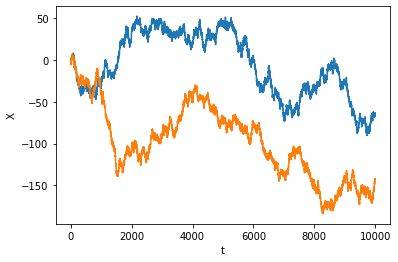

In [109]:
plt.plot(time, trajectory[1, :], trajectory[0, :])
plt.xlabel("t")
plt.ylabel("X")
plt.show()

Mean and Variance

1.226


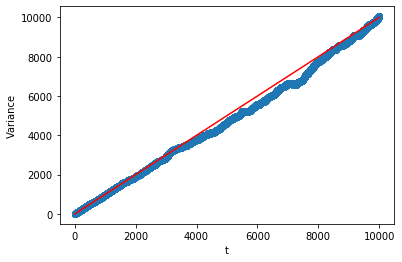

In [110]:
print(mean(trajectory[:,-1]))
plt.scatter(time, variance_series(trajectory))
plt.plot(time, time, color = 'red')
plt.xlabel("t")
plt.ylabel("Variance")
plt.show()

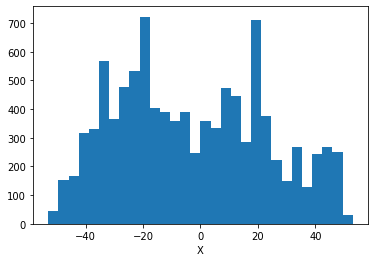

In [115]:
plt.hist(trajectory[500,:], 30)
plt.xlabel("X")
plt.show()

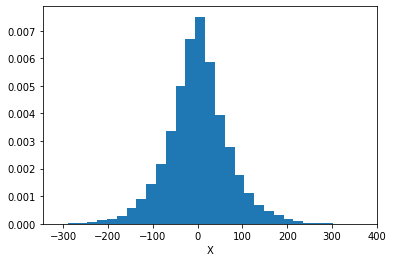

In [112]:
plt.hist(trajectory.reshape((N_part*(n_steps+1), 1)), 31, density = 'True')
plt.xlabel("X")
plt.show()

Question 2: Should these last 2 graphs be the same?

Discrete Probability Distribution  -> Gaussian as n_steps increase

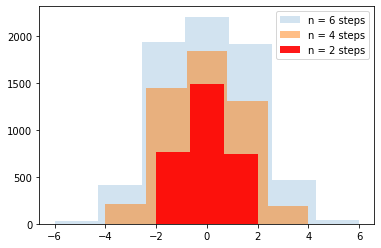

In [304]:
plt.hist(np.reshape(random_walk(N_part,6)[1], N_part*7), 7, alpha=0.2, label = 'n = 6 steps')
plt.hist(np.reshape(random_walk(N_part,4)[1], N_part*5),  5, alpha=0.5, label = 'n = 4 steps')
plt.hist(np.reshape(random_walk(N_part, 2)[1], N_part*3),  3, alpha=0.9, label = 'n = 2 steps', color = 'red')
plt.legend()
plt.show()

# Brownian dynamics in a Lennard-Jones potential (Mohsen's class, 1 particle)¶

In [541]:
from tqdm.notebook import tqdm

class BrownDyn:

    def __init__(self, n_dimensions, box_size,
                 n_particles, kT,
                 diffusion_coeff, particle_radius, lj_eps, dt):

        self.kT = kT
        self.particle_radius = particle_radius
        self.D = diffusion_coeff

        self.lj_eps = lj_eps
        self.lj_rm = 2.0 * self.particle_radius
        self.lj_rm2 = self.lj_rm * self.lj_rm
        
        self.n_dimensions = n_dimensions
        self.box_size = box_size
        self.n_particles = n_particles

        self.dt = dt
        
        self.pos = np.zeros((n_particles, self.n_dimensions))
        self.box_ind = np.zeros((n_particles, self.n_dimensions))
        self.force = np.zeros((n_particles, self.n_dimensions))

        self.init_particles()

    def init_particles(self):
        
        particle_per_row = np.floor(self.n_particles ** (1.0 / self.n_dimensions)).astype('int')
        
        n = np.zeros (self.n_dimensions) 
        
        l = self.box_size[:self.n_dimensions] / particle_per_row
        
        for i in range(self.n_particles):
            
            self.pos[i, :] = (0.3 * (np.random.random_sample(self.n_dimensions) - 0.5) * l +\
                              (n - particle_per_row / 2.0) * l) + 0.5 * l

            n[0] += 1

            for j in range(self.n_dimensions - 1):
                if n[j] >= particle_per_row:
                    n[j] = 0
                    n[j + 1] += 1

    def calc_force(self, ind1):

        ind2 = np.arange (ind1 + 1, self.n_particles)
        
        dx = self.pos[ind2, :] - self.pos[ind1, :]
        
        n_interactions = dx.shape[0]
        
        r2 = np.zeros(n_interactions)
        
        for n in range(self.n_dimensions):
            
            dx[:, n] -= np.rint (dx[:, n] / self.box_size[n]) * self.box_size[n]

            r2 += dx[:, n] * dx[:, n]
        
        req_r2 = self.lj_rm2 / r2
        req_r6 = req_r2 * req_r2 * req_r2
        req_r8 = req_r6 * req_r2
        req_r12 = req_r6 * req_r6
        req_r14 = req_r6 * req_r8

        uij = self.lj_eps * (req_r12 - 2.0 * req_r6)
        fij_r = 12.0 * self.lj_eps / self.lj_rm2 * (req_r8 - req_r14)
        
        for n in range(self.n_dimensions):

            _force = fij_r[:] * dx[:, n]
            
            self.force[ind1, n] += np.sum (_force)
            self.force[ind2, n] -= _force[:]

        return uij
    
    def V(self, x):
        r2 = x*x
        req_r2 = self.lj_rm2 / r2
        req_r6 = req_r2 * req_r2 * req_r2
        req_r12 = req_r6 * req_r6
        return self.lj_eps * (req_r12 - 2.0 * req_r6)

    def calc_forces(self):

        self.force.fill (0.0)

        for i in range(self.n_particles - 1):
            self.calc_force(i)
            
    def wrap(self):

        for i in range(self.n_particles):
            for n in range(self.n_dimensions):
                
                wrap_box_ind = np.rint (self.pos[:, n] / self.box_size[n])
                
                self.box_ind[:, n] += wrap_box_ind
                self.pos[:, n] -= wrap_box_ind * self.box_size[n]

    def make_steps(self, n_steps):

        traj = []
        unwrapped_traj = []
        
        time = np.arange(n_steps) * self.dt

        noise_std = np.sqrt(2.0 * self.D * self.dt)
        force_factor = self.D * self.dt / self.kT
        
        self.init_particles ()
        self.wrap ()
        
        print ("running simulation...")

        for k in tqdm(range (n_steps)):

            self.calc_forces()
            
            self.pos += self.force * force_factor  +\
                        np.random.normal(0.0, 1.0, (self.n_particles, self.n_dimensions)) * noise_std
            
            self.wrap ()
            
            traj.append (self.pos.copy ())
            unwrapped_traj.append(self.pos + self.box_size * self.box_ind)
            
        return time, np.array(traj), np.array(unwrapped_traj)

In [585]:
n_steps = 100000
n_particles = 1

kT = 1.0
D = 0.05

rad = 5.0

L = 12.0 * rad

print (f"Box length = {L}")

#box_size = np.ones(2) * L
box_size = np.ones(1) * L



eps = 0.5 * kT

dt = 0.5

bd = BrownDyn(n_dimensions=1, box_size=box_size,
              n_particles=n_particles, kT=kT,
              diffusion_coeff=D, particle_radius=rad,
              lj_eps=eps, dt=dt)

time, traj, unwrapped_traj = bd.make_steps(n_steps)


Box length = 60.0
running simulation...


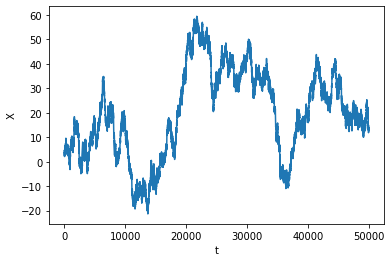

In [586]:
traj_1D = np.concatenate(unwrapped_traj).ravel()
displ = []
for i in range(len(traj_1D)-1):
    displ.append(traj_1D[i+1]-traj_1D[i])
plt.plot(time, traj_1D)
plt.xlabel("t")
plt.ylabel("X")
plt.show()

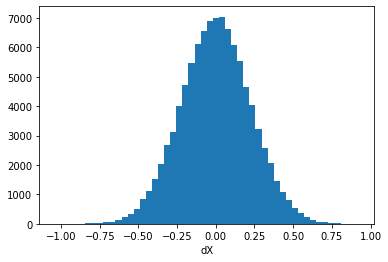

In [587]:
plt.hist(displ, 50)
plt.xlabel("dX")
plt.show()

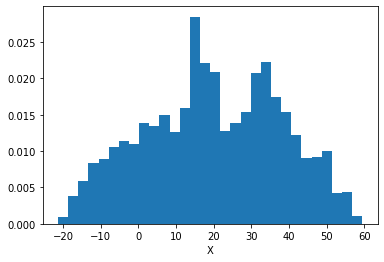

In [588]:
plt.hist(traj_1D[1000:], 30, density = 'True')
plt.xlabel("X")
plt.show()


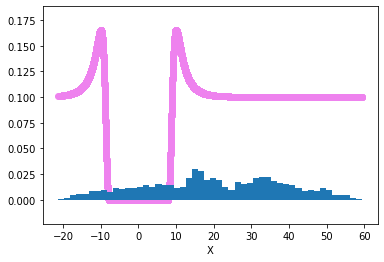

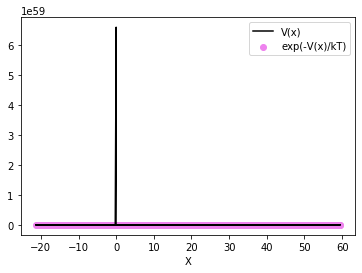

In [589]:
plot_X_histogram(traj_1D[1000:], bd.V, 1/10)
plt.show()

plot_X_histogram_potential(traj_1D, bd.V, 1/10, 1)
plt.show()